In [ ]:
# IPL Data Analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ipl_matches_80_rows.csv')
df.head()

,date,team1,team2,venue,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match
0,2023-04-01,CSK,RCB,Wankhede,MI,field,MI,51,3,Warner
1,2023-04-02,KKR,CSK,Feroz Shah Kotla,CSK,field,KKR,54,8,Virat
2,2023-04-03,CSK,MI,Chinnaswamy,PBKS,bat,SRH,26,8,Rahul
3,2023-04-04,MI,KKR,Chinnaswamy,MI,field,KKR,56,6,Pant
4,2023-04-05,CSK,MI,Wankhede,SRH,field,RCB,9,1,Russell


In [2]:
df = df.dropna(subset=['winner'])
print(df.isnull().sum())

date               0
team1              0
team2              0
venue              0
toss_winner        0
toss_decision      0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
dtype: int64


winner
KKR     16
PBKS    15
RR      15
MI       9
CSK      8
RCB      7
SRH      5
DC       5
Name: count, dtype: int64


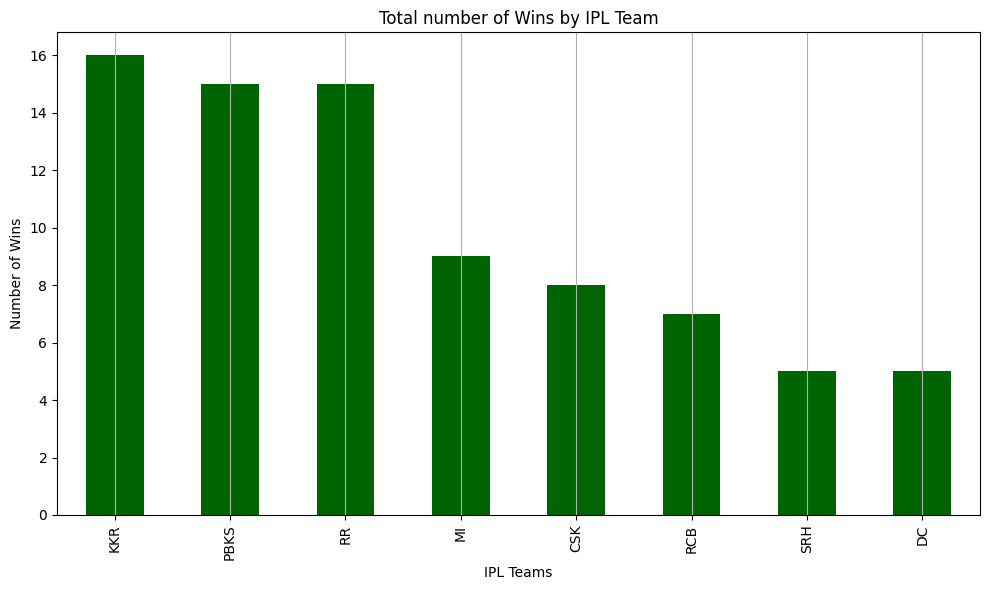

In [4]:
team_wins = df['winner'].value_counts()
print(team_wins)

plt.figure(figsize=(10, 6))
team_wins.plot(kind='bar', color='darkgreen')
plt.title('Total number of Wins by IPL Team')
plt.xlabel('IPL Teams')
plt.ylabel('Number of Wins')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

player_of_match
Warner     12
Dhoni      12
Rohit      12
Rahul      10
Buttler    10
Pant       10
Russell    10
Virat       4
Name: count, dtype: int64


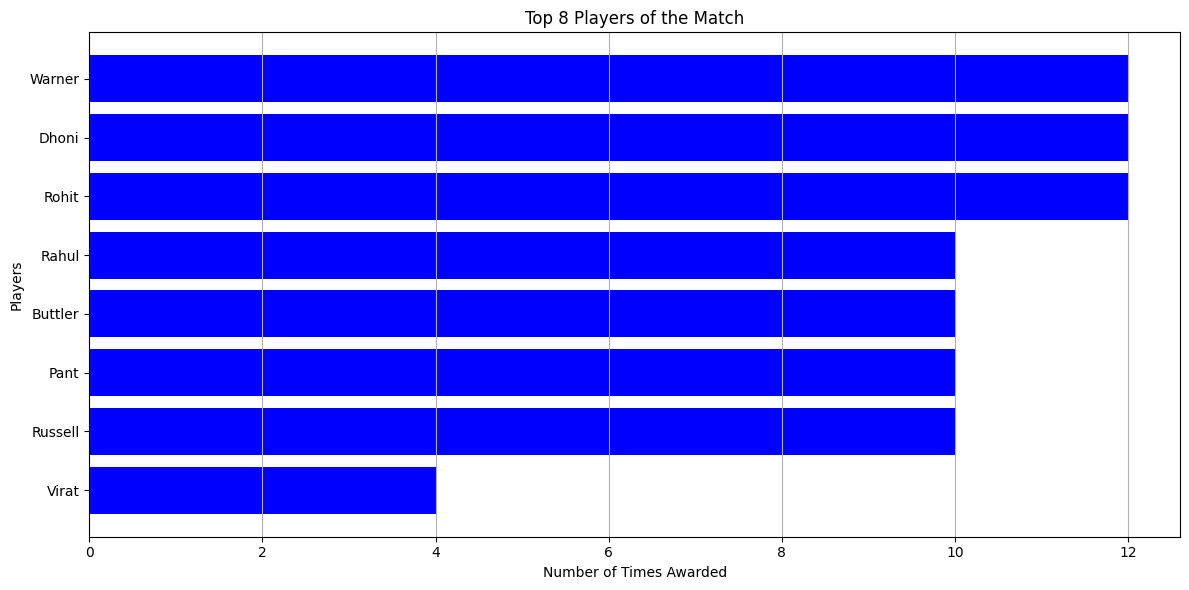

In [8]:
top_players = df['player_of_match'].value_counts().head(10)
print(top_players)

plt.figure(figsize=(12, 6))
plt.barh(list(top_players.index[::-1]), list(top_players.values[::-1]), color='blue')
plt.title('Top 8 Players of the Match')
plt.xlabel('Number of Times Awarded')
plt.ylabel('Players')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

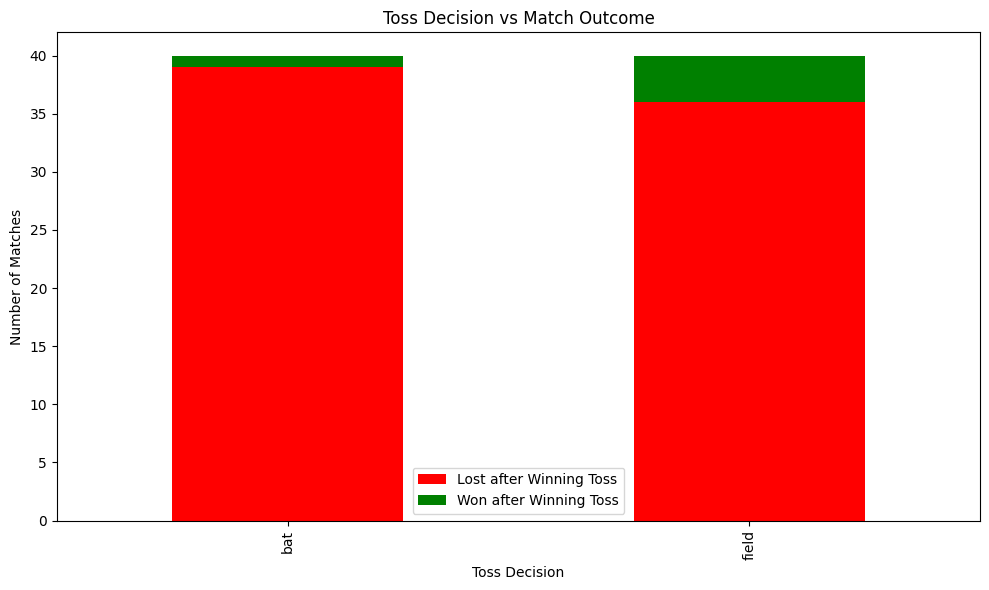

In [9]:
#toss decision
toss_win = df['toss_winner'] == df['winner']
toss_decision = df['toss_decision']

grouped = df.groupby(['toss_decision', toss_win]).size().unstack()

grouped.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Toss Decision vs Match Outcome')
plt.xlabel('Toss Decision', rotation=0)
plt.ylabel('Number of Matches')
plt.legend(["Lost after Winning Toss", "Won after Winning Toss"])
plt.tight_layout()
plt.show()

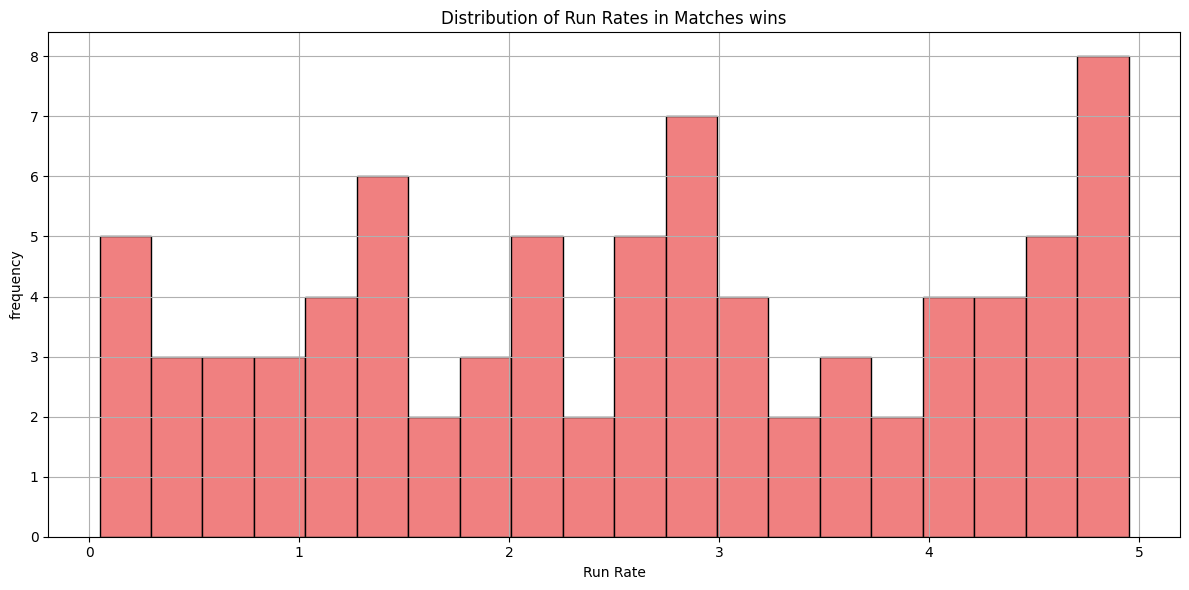

In [14]:
# run rate vs match outcome
df['run_rate'] = df['win_by_runs'] / 20 # Assuming 20 overs per match
df_run_rate = df[df['run_rate'] > 0]

plt.figure(figsize=(12, 6))
plt.hist(df_run_rate['run_rate'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Run Rates in Matches wins')
plt.xlabel('Run Rate')
plt.ylabel('frequency')
plt.grid(True)
plt.tight_layout()  
plt.show()

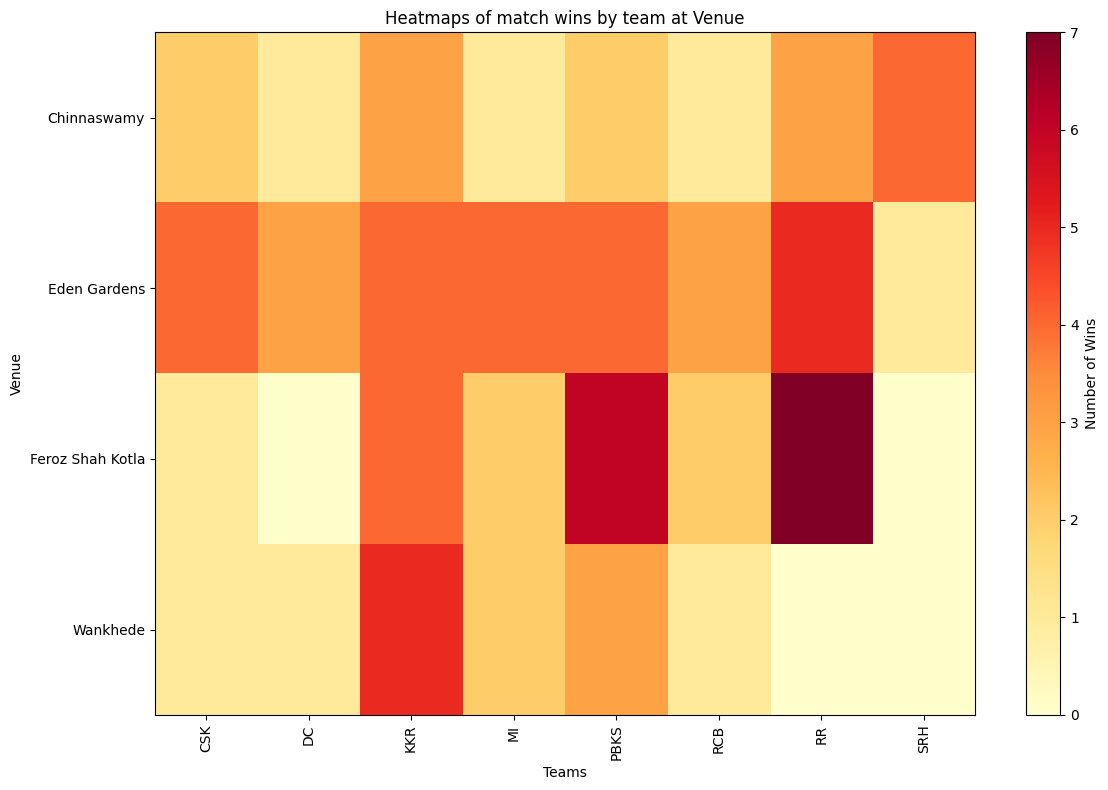

In [17]:
top_venues = df['venue'].value_counts().head(10).index
filtered_df = df[df['venue'].isin(top_venues)]

pivot = pd.crosstab(filtered_df['venue'], filtered_df['winner'])

plt.figure(figsize=(12, 8))
plt.imshow(pivot, cmap='YlOrRd', aspect='auto')
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=list(pivot.columns), rotation=90)
plt.yticks(ticks=np.arange(len(pivot.index)), labels=list(pivot.index))
plt.colorbar(label='Number of Wins')
plt.title('Heatmaps of match wins by team at Venue')
plt.xlabel('Teams')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()
